# Speech emotion recognition on longer audio files

In this notebook I'll perform speech emotion recognition on the full episode by performing two steps.

**1. Speaker diarization:**

Speech emotion recognition models are typically trained on short segments that are approximately 2-5 seconds long. Therefore, you need to divide the audio file into segments before you predict the emotions. The easiest way to do this is by simply dividing the file into fixed segments, for example each segment can be 3 seconds long. However, this method has a crucial flaw in it. These segment will not have any real-world meaning. Meaning that they may include silent moments, multiple speakers and/or music. Therefore, you may want to create the segments using speaker diarization, which is a model that is trained to identify segments.

In this notebook I will use the Pyannote diarization model, which is a free-to-use diarization model that can be found from GitHub (here: https://github.com/pyannote/pyannote-audio).

**2. Speech emotion recognition**

The second step is to perform the speech emotion recognition. Here, you can either train your own model. For those who are interested in doing that can look at tutorials on Kaggle, such as the one created by Eu Jin Lok (https://www.kaggle.com/code/ejlok1/audio-emotion-part-1-explore-data).

The second option is to use a pre-trained model, which I will do in this notebook. I choose to use a model called Audeer which uses Wav2Vec as the baseline and then is finetuned using the MSP-podcast dataset. The fact that it is fine-tuned on similar data means that it is likely to perform well on the podcast episode. But because I haven't labeled my dataset this is difficult to test.

Also, those who are interested in learning how to use the Audeer model can have a look at the tutorial that the researchers that created the model have posted on GitHub (here: https://github.com/audeering/w2v2-how-to/blob/master/notebook.ipynb)

# 1.1 Download model

I import the diarization model from torch.

In [4]:

import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia')

C:\Users\Patrick\anaconda3\lib\site-packages\torch\hub.py:266: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/pyannote/pyannote-audio/zipball/master" to C:\Users\Patrick/.cache\torch\hub\master.zip


  0%|          | 0.00/901 [00:00<?, ?B/s]

  0%|          | 0.00/1.49k [00:00<?, ?B/s]

Using cache found in C:\Users\Patrick/.cache\torch\hub\pyannote_pyannote-audio_master


  0%|          | 0.00/2.41M [00:00<?, ?B/s]

Using cache found in C:\Users\Patrick/.cache\torch\hub\pyannote_pyannote-audio_master


  0%|          | 0.00/2.40M [00:00<?, ?B/s]

Using cache found in C:\Users\Patrick/.cache\torch\hub\pyannote_pyannote-audio_master


  0%|          | 0.00/16.3M [00:00<?, ?B/s]

C:\Users\Patrick\anaconda3\lib\site-packages\pyannote\audio\embedding\approaches\arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)
C:\Users\Patrick\anaconda3\lib\site-packages\pyannote\audio\features\pretrained.py:156: UserWarning: Model was trained with 4s chunks and is applied on 2s chunks. This might lead to sub-optimal results.
  warnings.warn(msg)
Using cache found in C:\Users\Patrick/.cache\torch\hub\pyannote_pyannote-audio_master


# 1.2. Convert MP3 to wav

I have the file stored as an MP3 file but Pyannote requires a wav file. So, I need to convert the MP3 file to a wav file.

In [7]:
#Audio
import librosa
import librosa.display
from IPython.display import Audio
from os import path
from pydub import AudioSegment

#Data handling
import numpy as np
import pandas as pd

In [10]:
# files                                                                         
src = "VMP8001994894.mp3"
dst = "test.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='test.wav'>

# 1.3 Perform diarization

Now that the MP3 file is converted to wav I can perform the diarization using the pipeline. The pipeline performs both the pre-processing of the audio and the prediction of segments.

In [12]:
FILE = {'audio': "test.wav"}
diarization = pipeline(FILE)

C:\Users\Patrick\anaconda3\lib\site-packages\pyannote\audio\features\utils.py:179: FutureWarning: Pass orig_sr=44100, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.core.resample(y[:, 0], sample_rate, self.sample_rate)[:, None]
C:\Users\Patrick\anaconda3\lib\site-packages\pyannote\audio\features\utils.py:179: FutureWarning: Pass orig_sr=44100, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.core.resample(y[:, 0], sample_rate, self.sample_rate)[:, None]


In [25]:
# Shows the segments the model identified
for i in diarization.itersegments():
    print(i)
    

[ 00:00:00.399 -->  00:00:01.728]
[ 00:00:01.935 -->  00:00:05.467]
[ 00:00:05.825 -->  00:00:07.333]
[ 00:00:07.534 -->  00:00:10.030]
[ 00:00:10.253 -->  00:00:13.736]
[ 00:00:13.932 -->  00:00:15.671]
[ 00:00:15.968 -->  00:00:15.992]
[ 00:00:15.992 -->  00:00:19.998]
[ 00:00:20.604 -->  00:00:21.012]
[ 00:00:21.328 -->  00:00:24.220]
[ 00:00:24.748 -->  00:00:25.322]
[ 00:00:25.585 -->  00:00:26.367]
[ 00:00:26.716 -->  00:00:28.809]
[ 00:00:29.148 -->  00:00:29.394]
[ 00:00:29.738 -->  00:00:34.900]
[ 00:00:35.208 -->  00:00:37.496]
[ 00:00:37.828 -->  00:00:42.825]
[ 00:00:43.254 -->  00:00:44.091]
[ 00:00:44.460 -->  00:00:46.212]
[ 00:00:46.571 -->  00:00:50.633]
[ 00:00:51.166 -->  00:00:51.753]
[ 00:00:52.013 -->  00:00:52.567]
[ 00:00:52.808 -->  00:00:54.050]
[ 00:00:54.457 -->  00:00:55.172]
[ 00:00:55.415 -->  00:00:56.316]
[ 00:00:56.463 -->  00:00:59.043]
[ 00:01:01.587 -->  00:01:04.838]
[ 00:01:05.248 -->  00:01:06.546]
[ 00:01:07.037 -->  00:01:08.441]
[ 00:01:08.954

In [30]:
#Shows that it identified 10 speakers which is too many speakers but probably good enough for us.
diarization.chart()

[('E', 323.2051874999994),
 ('D', 248.8691250000002),
 ('J', 193.82456250000178),
 ('I', 187.56562500000064),
 ('G', 138.46950000000027),
 ('H', 68.24250000000109),
 ('B', 41.71499999999969),
 ('F', 40.690687499999996),
 ('C', 35.68050000000005),
 ('A', 33.174562499999666)]

In [54]:
"""
I convert the segments into a dataframe and calculate the start and endpoints using the sample rate.
"""
lst = []
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(turn)
    print(speaker)
    
    lst.append([turn.start, turn.end, turn.end-turn.start, speaker])
    
df = pd.DataFrame(lst, columns=['start', 'end', 'time', 'speaker'])
df['start_sample'] = df.start.apply(lambda x: int(x*16000))
df['end_sample'] = df.end.apply(lambda x: int(x*16000))

[ 00:00:00.399 -->  00:00:01.728]
G
[ 00:00:01.935 -->  00:00:05.467]
I
[ 00:00:05.825 -->  00:00:07.333]
A
[ 00:00:07.534 -->  00:00:10.030]
I
[ 00:00:10.253 -->  00:00:13.736]
I
[ 00:00:13.932 -->  00:00:15.671]
D
[ 00:00:15.968 -->  00:00:15.992]
G
[ 00:00:15.992 -->  00:00:19.998]
I
[ 00:00:20.604 -->  00:00:21.012]
I
[ 00:00:21.328 -->  00:00:24.220]
I
[ 00:00:24.748 -->  00:00:25.322]
I
[ 00:00:25.585 -->  00:00:26.367]
I
[ 00:00:26.716 -->  00:00:28.809]
D
[ 00:00:29.148 -->  00:00:29.394]
I
[ 00:00:29.738 -->  00:00:34.900]
I
[ 00:00:35.208 -->  00:00:37.496]
G
[ 00:00:37.828 -->  00:00:42.825]
I
[ 00:00:43.254 -->  00:00:44.091]
I
[ 00:00:44.460 -->  00:00:46.212]
I
[ 00:00:46.571 -->  00:00:50.633]
I
[ 00:00:51.166 -->  00:00:51.753]
I
[ 00:00:52.013 -->  00:00:52.567]
I
[ 00:00:52.808 -->  00:00:54.050]
G
[ 00:00:54.457 -->  00:00:55.172]
I
[ 00:00:55.415 -->  00:00:56.316]
I
[ 00:00:56.463 -->  00:00:59.043]
A
[ 00:01:01.587 -->  00:01:04.838]
A
[ 00:01:05.248 -->  00:01:06

# 3. Speech emotion recognition

Note all code is copied from https://github.com/audeering/w2v2-how-to/blob/master/notebook.ipynb

In [65]:
"""
I start by downloading and unpacking the model. This will get us two files, a binary ONNX file containing the 
model weights and a YAML file with meta information about the model.
"""

import os

import audeer


model_root = 'model'
cache_root = 'cache'


audeer.mkdir(cache_root)
def cache_path(file):
    return os.path.join(cache_root, file)


url = 'https://zenodo.org/record/6221127/files/w2v2-L-robust-12.6bc4a7fd-1.1.0.zip'
dst_path = cache_path('model.zip')

if not os.path.exists(dst_path):
    audeer.download_url(
        url, 
        dst_path, 
        verbose=True,
    )
    
if not os.path.exists(model_root):
    audeer.extract_archive(
        dst_path, 
        model_root, 
        verbose=True,
    )

In [67]:
#import and initiate model

import audonnx


model = audonnx.load(model_root)
model

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

SystemError: <built-in function __import__> returned a result with an error set

Input:
  signal:
    shape: [1, -1]
    dtype: tensor(float)
    transform: None
Output:
  hidden_states:
    shape: [1, 1024]
    dtype: tensor(float)
    labels: [hidden_states-0, hidden_states-1, hidden_states-2, (...), hidden_states-1021,
      hidden_states-1022, hidden_states-1023]
  logits:
    shape: [1, 3]
    dtype: tensor(float)
    labels: [arousal, dominance, valence]

In [70]:
#Prepare the interface

import audinterface

SAMPLING_RATE=16000

interface = audinterface.Feature(
    model.labels('logits'),
    process_func=model,
    process_func_args={
        'outputs': 'logits',
    },
    sampling_rate=SAMPLING_RATE,
    resample=True,    
    verbose=True,
)

In [113]:
#Perform predictions to each segment

file = "VMP8001994894.mp3"
unseen_data, sr = librosa.load(file)

episode_emotions = []
for i, row in df.iterrows():
    
    #it throws an error if the duration of the segment is too short
    try:
        emotions = interface.process_signal(unseen_data[row.start_sample: row.end_sample], SAMPLING_RATE)
        episode_emotions+= [[
            row.start,
            row.end,
            emotions['arousal'][0],
            emotions['dominance'][0],
            emotions['valence'][0]
        ]]
    except:
        episode_emotions+= [[
            row.start,
            row.end,
            -99,
            -99,
            -99
        ]]
        


In [116]:
emotion_df = pd.DataFrame(episode_emotions, columns=['start','end','arousal','dominance','valence'])


# 3. Exploratory analysis

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='start', ylabel='arousal'>

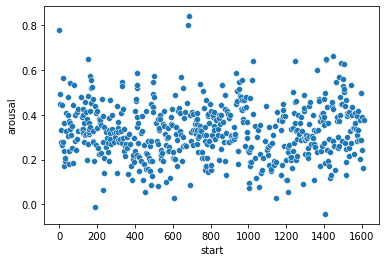

In [119]:
sns.scatterplot(x='start', y='arousal', data=emotion_df[emotion_df.arousal>-99])

In [147]:
def createStartAndArousal(emotion_df, colName, step_size=100):
    start = []
    emotion = []

    for i in range(step_size, 1600, step_size):
        start.append(i)
        emotion.append(emotion_df[
            (emotion_df.start>=(i-step_size))&
            (emotion_df.start < i)&
            (emotion_df.arousal>-99)
        ][colName].mean())
    return start, emotion

<AxesSubplot:>

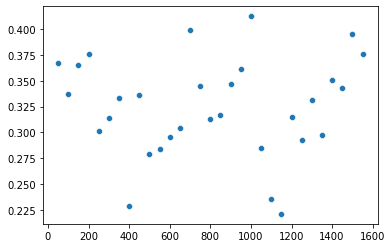

In [150]:
start, arousal = createStartAndArousal(emotion_df, 'arousal', 50)
sns.scatterplot(x=start, y=arousal)

<AxesSubplot:>

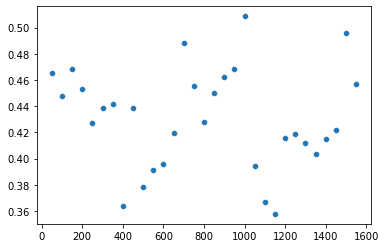

In [151]:
start, dominance = createStartAndArousal(emotion_df, 'dominance', 50)
sns.scatterplot(x=start, y=dominance)

<AxesSubplot:>

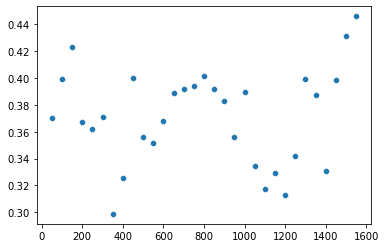

In [152]:
start, valence = createStartAndArousal(emotion_df, 'valence', 50)
sns.scatterplot(x=start, y=valence)